# PISA (Programme for International Student Assessment) Analysis
## by Rafael Roldao L Dantas

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

> Database source: https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
pisa_df = pd.read_csv('pisa2012.csv', sep=',', encoding='latin-1', error_bad_lines=False, index_col=0, dtype='unicode')

In [3]:
pisa_df.head(10)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,02,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,02,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,09,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,08,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
6,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00006,9,1,09,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
7,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00007,10,1,03,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
8,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00008,10,1,06,...,14.4599,14.6374,15.8728,15.8728,5.2248,15.2579,19,1,0.2322,22NOV13
9,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00009,9,1,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
10,Albania,0080000,ALB0005,Non-OECD,Albania,0000002,00010,10,1,08,...,3.3844,10.1533,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13


In [9]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: object(635)
memory usage: 2.3+ GB


In [19]:
list(pisa_df['OECD'].value_counts().index)

['OECD', 'Non-OECD']

In [26]:
pisa_oecd = pisa_df[pisa_df['OECD'] == 'OECD']
pisa_oecd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295416 entries, 22152 to 480531
Columns: 635 entries, CNT to VER_STU
dtypes: object(635)
memory usage: 1.4+ GB


In [27]:
pisa_oecd.to_csv('pisa_oecd_2012.csv')

In [29]:
pisa_oecd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295416 entries, 22152 to 480531
Columns: 635 entries, CNT to VER_STU
dtypes: object(635)
memory usage: 1.4+ GB


In [60]:
pisa_oecd_original = pd.read_csv('pisa_oecd_2012.csv', sep=',', encoding='latin-1', error_bad_lines=False, index_col=0, dtype='unicode')

In [61]:
pisa_oecd = pisa_oecd_original.copy()
pisa_oecd.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
22152,Australia,0360000,AUS0309,OECD,Australia,0000001,00001,10,1,11,...,21.3359,21.3359,45.7184,45.7184,21.3359,45.7184,76,3,0.1332,22NOV13
22153,Australia,0360000,AUS0309,OECD,Australia,0000001,00002,10,2,12,...,21.3359,21.3359,45.7184,45.7184,21.3359,45.7184,76,3,0.1332,22NOV13
22154,Australia,0360000,AUS0309,OECD,Australia,0000001,00003,10,1,07,...,21.3359,21.3359,45.7184,45.7184,21.3359,45.7184,76,3,0.1332,22NOV13
22155,Australia,0360000,AUS0309,OECD,Australia,0000001,00004,10,1,09,...,21.1106,21.1106,52.0104,52.0104,21.1106,52.0104,76,3,0.1405,22NOV13
22156,Australia,0360000,AUS0309,OECD,Australia,0000001,00005,10,1,06,...,21.1106,21.1106,52.0104,52.0104,21.1106,52.0104,76,3,0.1405,22NOV13


In [62]:
list(pisa_oecd['CNT'].value_counts().index)

['Mexico',
 'Italy',
 'Spain',
 'Canada',
 'Australia',
 'United Kingdom',
 'Switzerland',
 'Finland',
 'Belgium',
 'Denmark',
 'Chile',
 'Japan',
 'Slovenia',
 'Portugal',
 'Czech Republic',
 'Luxembourg',
 'Greece',
 'Israel',
 'Korea',
 'Ireland',
 'Germany',
 'United States of America',
 'Turkey',
 'Hungary',
 'Estonia',
 'Austria',
 'Sweden',
 'Norway',
 'Slovak Republic',
 'France',
 'Poland',
 'Netherlands',
 'New Zealand',
 'Iceland']

In [63]:
list(pisa_oecd['ST01Q01'].value_counts().index)

['10', '9', '11', '8', '12', '7', '96', '13']

### Math Analysis

In [64]:
type(pisa_oecd.PV1MATH.iloc[0])

str

In [65]:
pisa_oecd['PV1MATH'] = pisa_oecd['PV1MATH'].astype(float)
pisa_oecd['PV2MATH'] = pisa_oecd['PV2MATH'].astype(float)
pisa_oecd['PV3MATH'] = pisa_oecd['PV3MATH'].astype(float)
pisa_oecd['PV4MATH'] = pisa_oecd['PV4MATH'].astype(float)
pisa_oecd['PV5MATH'] = pisa_oecd['PV5MATH'].astype(float)

In [72]:
pisa_oecd['PV1MATH'].describe()

count    295416.000000
mean        488.347772
std          95.422257
min          59.674400
25%         420.945600
50%         487.466900
75%         554.845000
max         896.798600
Name: PV1MATH, dtype: float64

In [106]:
df_math = pisa_oecd.iloc[:, np.r_[:5, 500:505]]
df_math = df_math.groupby('CNT').mean()
df_math = df_math.reset_index()
df_math

,CNT,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH
0,Australia,492.842855,493.335736,493.353218,493.636585,493.176301
1,Austria,507.711753,507.529917,507.837725,507.763517,508.051011
2,Belgium,519.868902,519.855583,519.374375,519.873523,519.369665
3,Canada,509.328982,509.618661,509.099141,509.423964,509.617685
4,Chile,444.419644,444.728561,444.243997,445.436035,444.633352
5,Czech Republic,519.774978,520.761993,520.122992,520.326682,519.319781
6,Denmark,486.185453,486.348821,486.233246,486.387034,486.051865
7,Estonia,521.805050,522.359874,522.483747,522.105932,522.949414
8,Finland,507.525776,506.943227,507.697462,507.164848,507.298068
9,France,499.470436,497.732896,498.264796,497.969635,498.441589


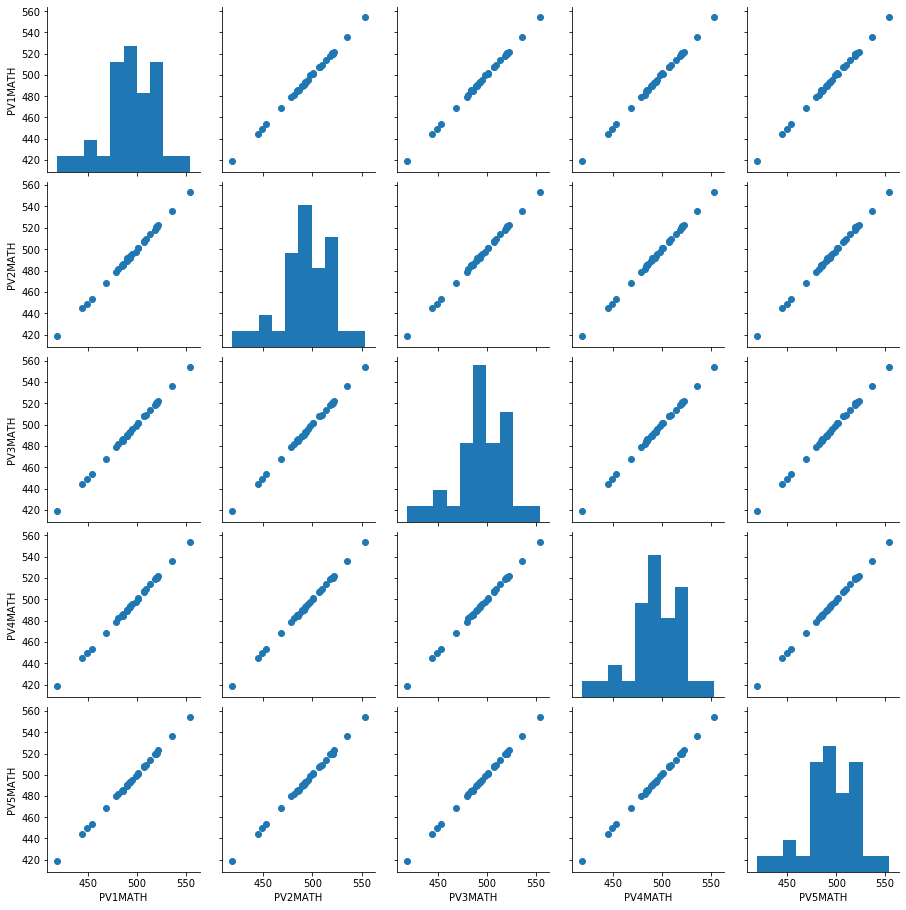

In [110]:
g = sb.PairGrid(data=df_math, vars=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

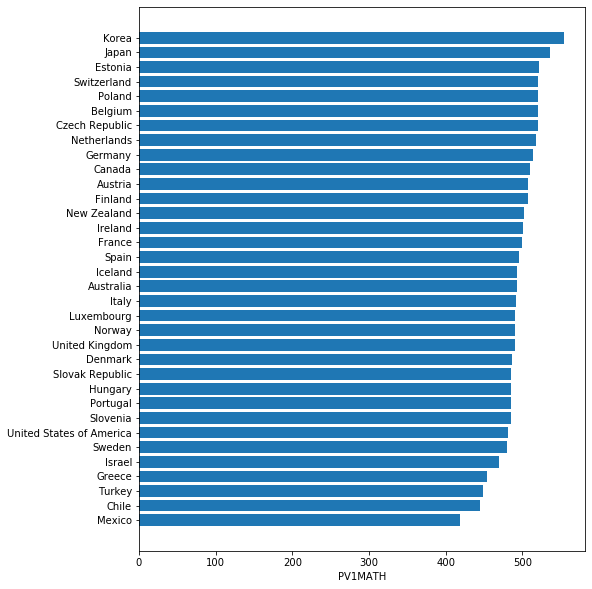

In [146]:
df_math_chart = df_math.sort_values('PV1MATH')

plt.figure(figsize=[8,10])
plt.barh('CNT', 'PV1MATH', data=df_math_chart)
plt.xlabel('PV1MATH');

### Reading Analysis

In [150]:
pisa_oecd.PV1READ.iloc[0]

'582.3127'

In [149]:
type(pisa_oecd.PV1READ.iloc[0])

str

In [151]:
pisa_oecd['PV1READ'] = pisa_oecd['PV1READ'].astype(float)
pisa_oecd['PV2READ'] = pisa_oecd['PV2READ'].astype(float)
pisa_oecd['PV3READ'] = pisa_oecd['PV3READ'].astype(float)
pisa_oecd['PV4READ'] = pisa_oecd['PV4READ'].astype(float)
pisa_oecd['PV5READ'] = pisa_oecd['PV5READ'].astype(float)

In [152]:
df_read = pisa_oecd.iloc[:, np.r_[:5, 540:545]]
df_read = df_read.groupby('CNT').mean()
df_read = df_read.reset_index()
df_read

,CNT,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ
0,Australia,500.845303,501.012221,501.296108,501.186905,500.944116
1,Austria,490.918021,491.921403,491.204811,491.517774,491.865745
2,Belgium,512.319008,512.054427,512.264622,512.687829,512.082752
3,Canada,511.235906,511.293748,510.857946,510.622800,510.778339
4,Chile,459.999572,460.618594,459.947040,460.843767,460.173572
5,Czech Republic,513.008171,512.523759,512.974513,511.755080,511.801804
6,Denmark,483.913033,483.961216,483.330226,483.606304,483.386161
7,Estonia,517.804450,518.090497,518.343731,517.750111,519.051659
8,Finland,510.905535,510.795479,510.892687,510.439047,510.264025
9,France,509.233472,508.950575,509.189604,508.399976,509.409468


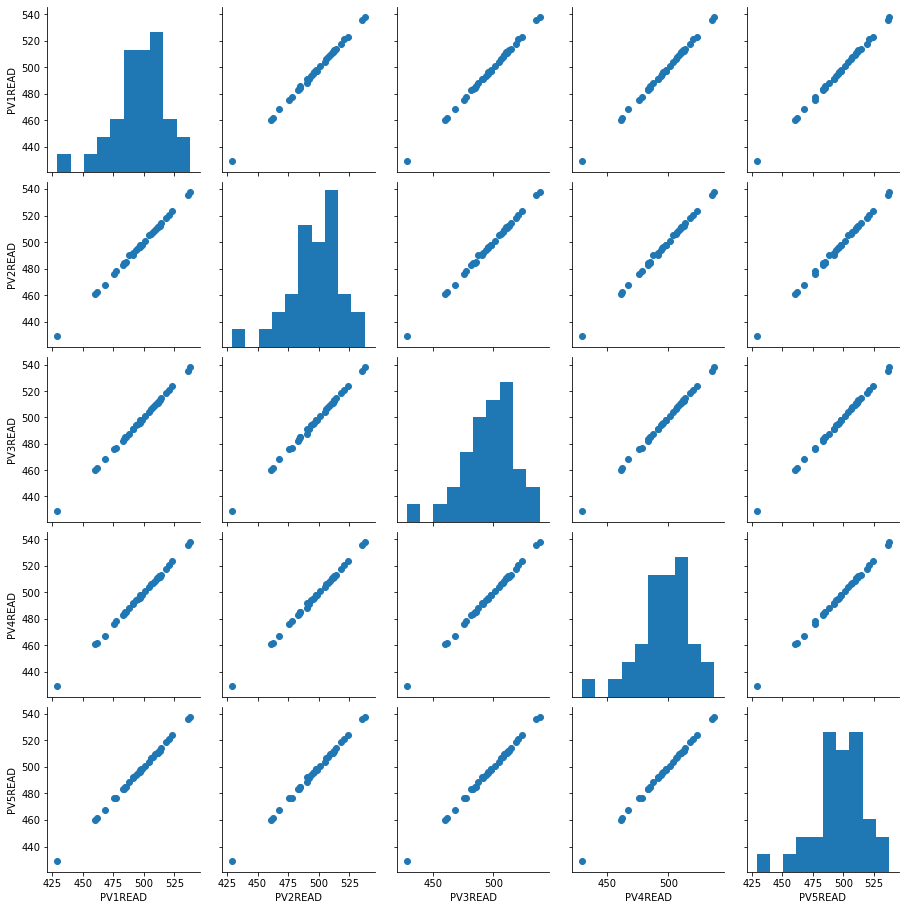

In [153]:
r = sb.PairGrid(data=df_read, vars=['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ'])
r.map_diag(plt.hist)
r.map_offdiag(plt.scatter);

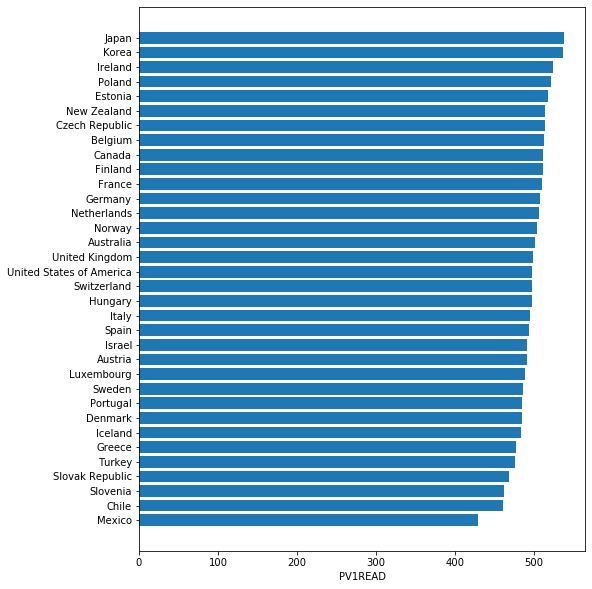

In [154]:
df_read_chart = df_read.sort_values('PV1READ')

plt.figure(figsize=[8,10])
plt.barh('CNT', 'PV1READ', data=df_read_chart)
plt.xlabel('PV1READ');

## Bivariate Analysis

In [ ]:
plt.figure(figsize=[10,5])


### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!